In [2]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Store Data
AAPL = pd.read_csv('AAPL1521.US.csv')
# Show the Data
AAPL

,Date,Open,High,Low,Close,Adjusted_close,Volume
0,1/2/2015,111.39,111.44,107.350,109.33,24.8985,53204626
1,1/5/2015,108.29,108.65,105.410,106.25,24.1971,64285491
2,1/6/2015,106.54,107.43,104.630,106.26,24.1996,65797116
3,1/7/2015,107.20,108.20,106.695,107.75,24.5388,40105934
4,1/8/2015,109.23,112.15,108.700,111.89,25.4817,59364547
...,...,...,...,...,...,...,...
1508,12/29/2020,138.05,138.79,134.340,134.87,134.8700,121047300
1509,12/30/2020,135.58,135.99,133.400,133.72,133.7200,96452100
1510,12/31/2020,134.08,134.74,131.720,132.69,132.6900,98990400
1511,1/4/2021,133.52,133.61,126.760,129.41,129.4100,143301900


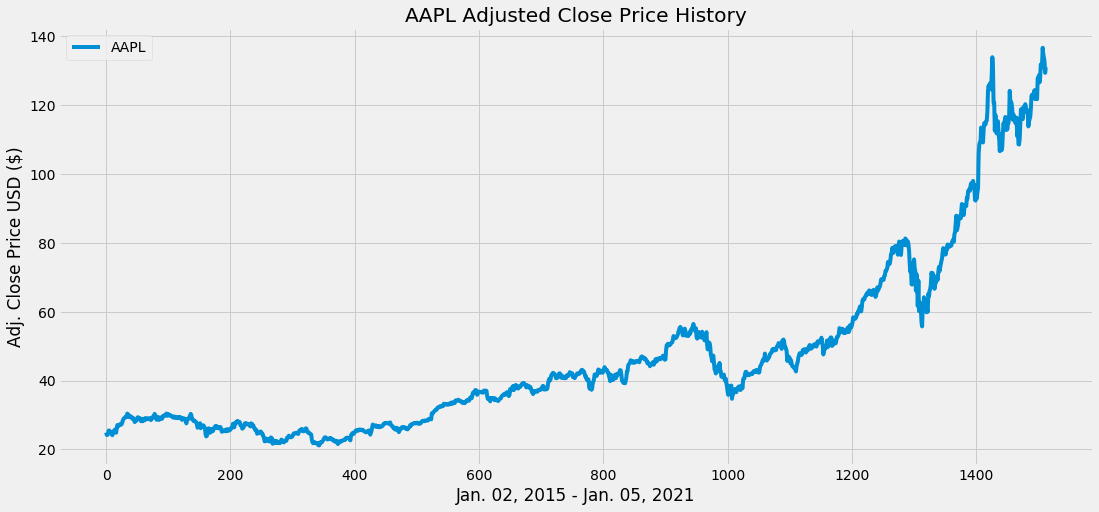

In [4]:
# Visualize the data
plt.figure(figsize = (16.5, 7.5))
plt.plot(AAPL['Adjusted_close'], label = 'AAPL')
plt.title('AAPL Adjusted Close Price History')
plt.xlabel('Jan. 02, 2015 - Jan. 05, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [46]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adjusted_close'] = AAPL['Adjusted_close'].rolling(window = 30).mean()
SMA30

,Adjusted_close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1508,123.612167
1509,124.059500
1510,124.502833
1511,124.882167


In [47]:
# Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adjusted_close'] = AAPL['Adjusted_close'].rolling(window = 100).mean()
SMA100

,Adjusted_close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1508,118.571020
1509,118.799009
1510,119.000575
1511,119.202809


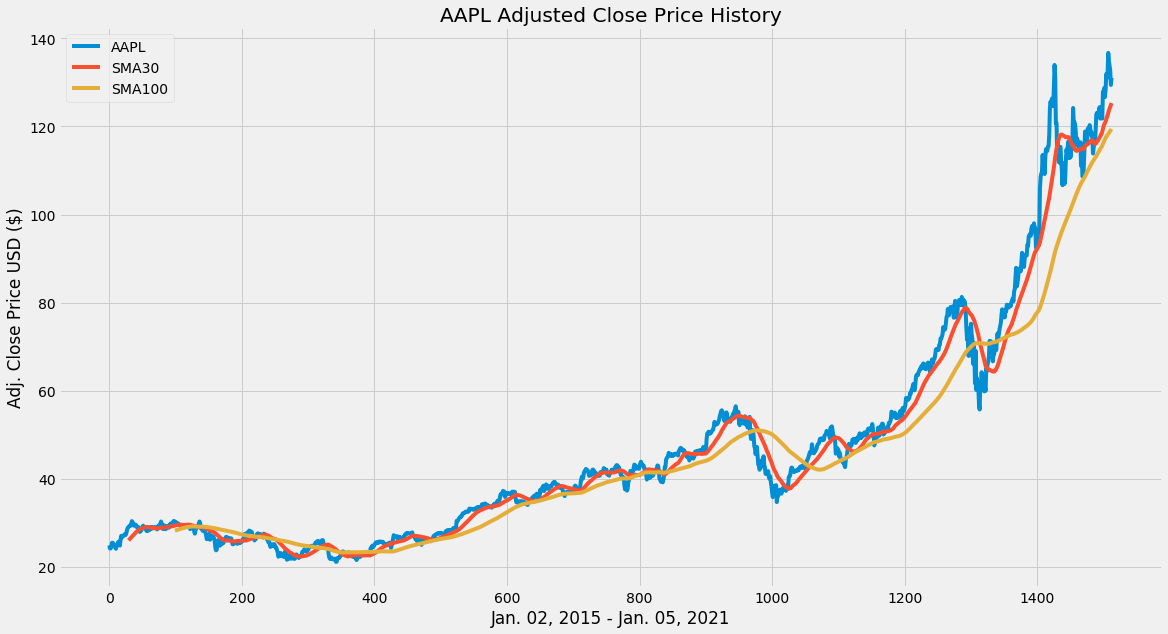

In [68]:
# Visualize the data
plt.figure(figsize = (17.6, 9.6))
plt.plot(AAPL['Adjusted_close'], label = 'AAPL')
plt.title('AAPL Adjusted Close Price History')
plt.plot(SMA30['Adjusted_close'], label = 'SMA30')
plt.plot(SMA100['Adjusted_close'], label = 'SMA100')
plt.xlabel('Jan. 02, 2015 - Jan. 05, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [51]:
# Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adjusted_close']
data['SMA30'] = SMA30['Adjusted_close']
data['SMA100'] = SMA100['Adjusted_close']
data

,AAPL,SMA30,SMA100
0,24.8985,NaN,NaN
1,24.1971,NaN,NaN
2,24.1996,NaN,NaN
3,24.5388,NaN,NaN
4,25.4817,NaN,NaN
...,...,...,...
1508,134.8700,123.612167,118.571020
1509,133.7200,124.059500,118.799009
1510,132.6900,124.502833,119.000575
1511,129.4100,124.882167,119.202809


In [62]:
# Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
    signalPriceBuy = []
    signalPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                signalPriceBuy.append(data['AAPL'][i])
                signalPriceSell.append(np.nan)
                flag = 1
            else:
                signalPriceBuy.append(np.nan)
                signalPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                signalPriceBuy.append(np.nan)
                signalPriceSell.append(data['AAPL'][i])
                flag = 0
            else:
                signalPriceBuy.append(np.nan)
                signalPriceSell.append(np.nan)
        else:
            signalPriceBuy.append(np.nan)
            signalPriceSell.append(np.nan)
            
    return (signalPriceBuy, signalPriceSell)

In [63]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [64]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,24.8985,NaN,NaN,NaN,NaN
1,24.1971,NaN,NaN,NaN,NaN
2,24.1996,NaN,NaN,NaN,NaN
3,24.5388,NaN,NaN,NaN,NaN
4,25.4817,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1508,134.8700,123.612167,118.571020,NaN,NaN
1509,133.7200,124.059500,118.799009,NaN,NaN
1510,132.6900,124.502833,119.000575,NaN,NaN
1511,129.4100,124.882167,119.202809,NaN,NaN


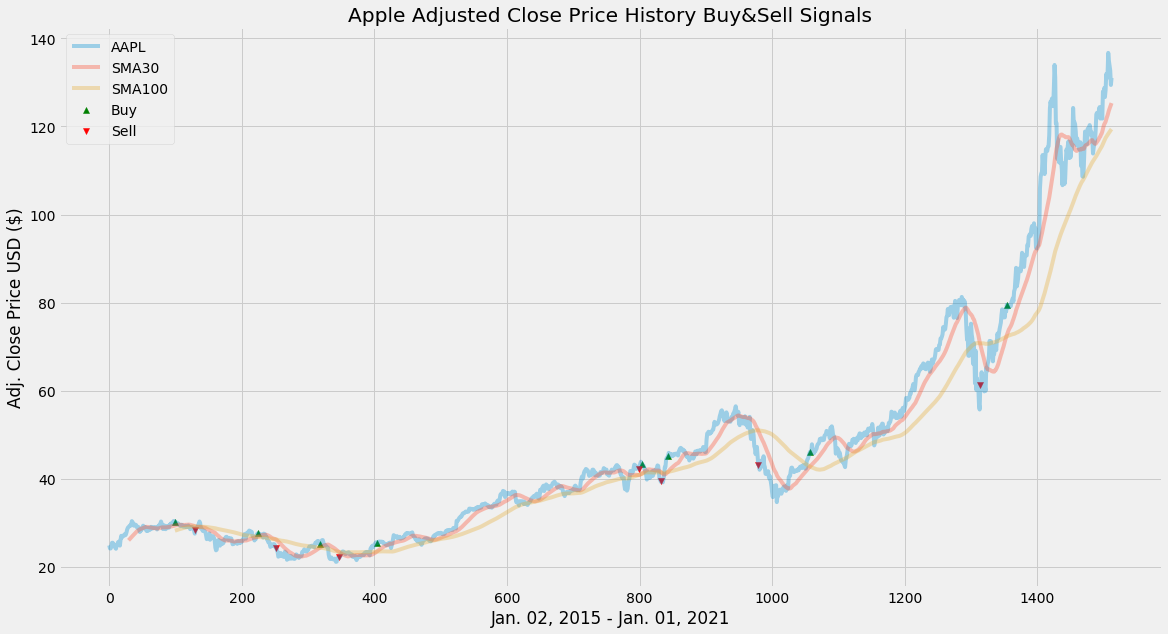

In [67]:
# Visualzie the data and the strategy to buy and sell the stock
plt.figure(figsize = (17.6, 9.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adjusted Close Price History Buy&Sell Signals')
plt.xlabel('Jan. 02, 2015 - Jan. 01, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()